In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("house_price.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


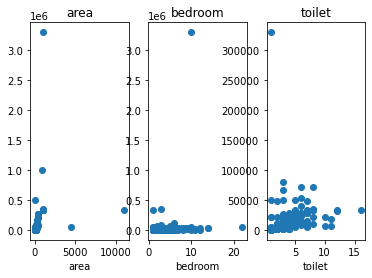

In [20]:
fig, ax = plt.subplots(1,3)

ax[0].scatter(df['area'],df['price'])
ax[0].set_title('area')
ax[0].set_xlabel('area')

ax[1].scatter(df['bedroom'],df['price'])
ax[1].set_title('bedroom')
ax[1].set_xlabel('bedroom')

ax[2].scatter(df['toilet'],df['price'])
ax[2].set_title('toilet')
ax[2].set_xlabel('toilet')

plt.show()

In [21]:
df1 = df.dropna(subset=['area','price'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               615 non-null    float64
 1   price              615 non-null    float64
 2   postDate           615 non-null    int64  
 3   land_certificate   359 non-null    object 
 4   house_direction    41 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             237 non-null    float64
 7   bedroom            316 non-null    float64
 8   floor              357 non-null    float64
 9   lat                615 non-null    float64
 10  long               615 non-null    float64
 11  property_type      615 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 62.5+ KB


In [23]:
df['Unit_price'] = df['price']/df['area']


In [27]:

df1 = df.groupby('house_direction')['Unit_price'].mean().reset_index()
df1

,house_direction,Unit_price
0,Bac,121.428571
1,Nam,86.228070
2,Tay-Bac,209.429548
3,Tay-Nam,158.382193
4,dong,131.897695
5,dong-Bac,392.799398
6,dong-Nam,226.849095


In [30]:
df2 = df.groupby('house_direction')['postDate'].sum().reset_index()
df2['per'] = df2['postDate']/sum(df2['postDate'])
df2

,house_direction,postDate,per
0,Bac,44306,0.023810
1,Nam,132785,0.071359
2,Tay-Bac,265874,0.142882
3,Tay-Nam,354392,0.190452
4,dong,132904,0.071423
5,dong-Bac,177172,0.095213
6,dong-Nam,753362,0.404860


Text(0, 0.5, 'per')

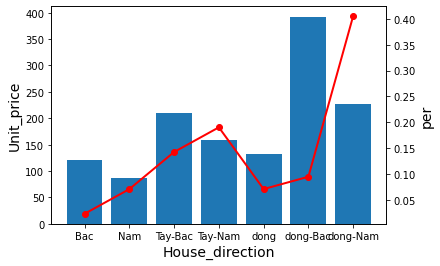

In [35]:
plt.bar(df1['house_direction'],df1['Unit_price'])
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(df1['house_direction'],df2['per'],label = 'line 1', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('House_direction', fontsize = 14)

axes1.set_ylabel('Unit_price', fontsize = 14) 
axes2.set_ylabel('per', fontsize = 14) 

In [37]:
df3 = df.groupby('bedroom')['Unit_price'].mean().reset_index()
df3

,bedroom,Unit_price
0,1.0,91.436060
1,2.0,69.011600
2,3.0,147.163571
3,4.0,194.181674
4,5.0,251.253134
5,6.0,286.300478
6,7.0,248.847611
7,8.0,339.389752
8,9.0,246.904762
9,10.0,569.448872


In [40]:
df4 = df.groupby('toilet')['Unit_price'].mean().reset_index()
df4

,toilet,Unit_price
0,1.0,50.936726
1,2.0,71.182310
2,3.0,163.079407
3,4.0,189.376809
4,5.0,292.106801
5,6.0,302.323537
6,7.0,247.928762
7,8.0,360.760726
8,10.0,229.971014
9,11.0,186.851852


Text(0, 0.5, 'toilet')

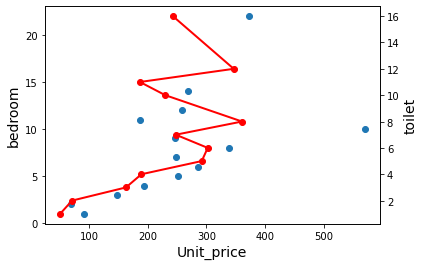

In [42]:
plt.scatter(df3['Unit_price'],df3['bedroom'])
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(df4['Unit_price'],df4['toilet'],label = 'line 1', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Unit_price', fontsize = 14)

axes1.set_ylabel('bedroom', fontsize = 14) 
axes2.set_ylabel('toilet', fontsize = 14) 